In [1]:
import belief_propagation as bp
from IPython.core.debugger import set_trace
import networkx as nx
import matplotlib.pyplot as plt
import random

In [2]:
def plotGraph(data, nodes_names):
    g = nx.DiGraph()
    g.add_nodes_from(nodes_names)
    for node in nodes_names:
        for item in data[node].neighbours_names:
            g.add_edge(node, item)
    nx.draw(g, with_labels=True)
    plt.draw()
    plt.show()

In [3]:
#Read the data from file
data = bp.read_input_file()
N, M = [int(x) for x in data[0].split()]

In [4]:
#Copute the initial bayes network graph
G, nodes_names = bp.build_graph(data, N, M)

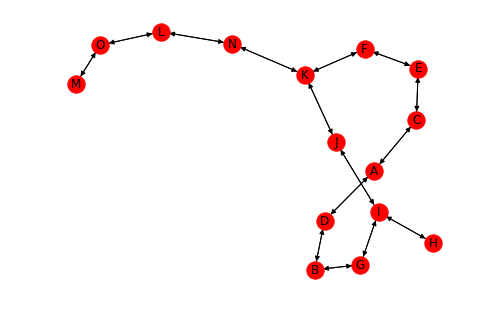

In [5]:
 #Compute the undirected graph from th BN
U = bp.build_undirected_graph(G)
plotGraph(U, nodes_names)

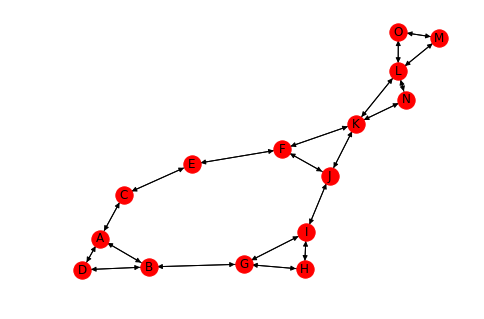

In [6]:
#Moralize the undirected graph
H = bp.moralize_graph(U)
plotGraph(H, nodes_names)

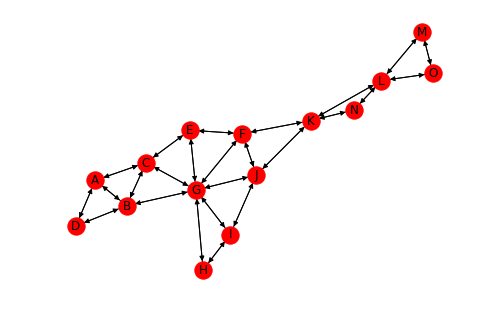

In [7]:
#Compute the chordal graph
H_star = bp.build_chordal_graph(H)
plotGraph(H_star, nodes_names)

In [8]:
#Compute the maximal cliques from the graph
maximal_cliques = bp.build_maximal_cliques(H_star, nodes_names)

In [9]:
#Build the graph of cliques and the maximal tree out of it
C = bp.build_graph_of_cliques(maximal_cliques)
T = bp.kruskal(C, len(maximal_cliques))


In [10]:
#Represent the tree as a graph and compute the factor for all nodes
clique_tree = bp.graph_from_tree(T)
bp.compute_factor_cliques(G, maximal_cliques, clique_tree)

('A', 'B', 'D')
('A', 'B', 'C')
('B', 'C', 'G')
('C', 'E', 'G')
('E', 'F', 'G')
('F', 'G', 'J')
('F', 'J', 'K')
('G', 'I', 'J')
('G', 'H', 'I')
('K', 'L', 'N')
('L', 'M', 'O')


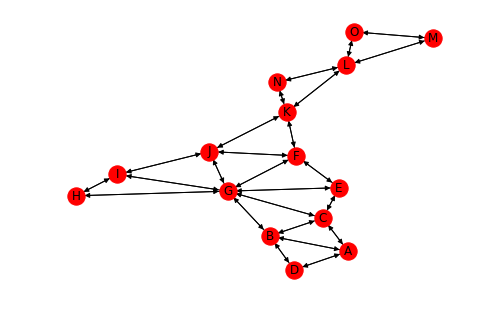

In [11]:
for item in clique_tree:
    print(item)
plotGraph(H_star, nodes_names)

In [12]:
#Mark the child-parent relationship inside the graph
bp.dfs(clique_tree)

In [13]:
def calculate_final_probability(left_values, good_factor):
    for pair in good_factor.values:
        good_line = True
        print(good_line)
        #Find the line that contains the right values for all variables
        for i in range(0, len(good_factor.variables)):
            var = good_factor.variables[i]
            if int(left_values[var]) != int(pair[i]):
                good_line = False
                break
       
        #Proability found
        import pdb; pdb.set_trace()
        if good_line == True:
            return good_factor.values[pair]

In [14]:
#Calculate all the probabilities
for line in range(N + 1, N + M + 1):
    #Get the values from the left and right for the current probability
    left_values, right_values = bp.read_probability(data, line)

    #Save the expected result for the probability
    correct_answer = data[N + M + 1 + (line - N - 1)]

    leaf = []
    root = []

    #Calculate Phi_0 for all nodes in graph
    bp.calculate_factor_0(clique_tree, root, leaf, right_values)
    root = root[0]

    #Calculate Phi_1 for all nodes in graph
    bp.calculate_factor_1(clique_tree, leaf)

    #Calculate Phi_u for all node in graph
    bp.calculate_factor_u(clique_tree, root)

    #Find a clique that contains all vars from probability
    good_factor = bp.get_good_factor(clique_tree, left_values)

    if good_factor == None:
        #Create a new factor having variables from separate cliques
        good_factor = bp.factor_from_separate_cliques(clique_tree, root,
                left_values)
        print("BONUS")

    #Compute the final probability to be printed
    good_factor = bp.normalize_factor(good_factor, left_values) 
    probability = 0
    for pair in good_factor.values:
        good_line = True
        #Find the line that contains the right values for all variables
        for i in range(0, len(good_factor.variables)):
            var = good_factor.variables[i]
            if int(left_values[var]) != int(pair[i]):
                good_line = False
                break
        if good_line == True:
            probability = good_factor.values[pair]
    print(data[line])
    print("Own probability =",'%.7f' % probability)
    print("Ref probability =" + correct_answer)
    print("=================")

J=1 | L=1

Own probability = 0.5262375
Ref probability =0.5262375

J=1 | A=0 H=1

Own probability = 0.5420000
Ref probability =0.5420000

BONUS
D=1 C=0 | A=0 J=1

Own probability = 0.1323274
Ref probability =0.1323274

E=1 | C=0 D=1

Own probability = 0.1500000
Ref probability =0.9000000

E=1 | C=0 D=1

Own probability = 0.1500000
Ref probability =0.9000000

BONUS
E=0 B=1 | F=0

Own probability = 0.0645756
Ref probability =0.1237446

E=1 C=0 | J=1 B=0 D=1

Own probability = 0.0543750
Ref probability =0.3262500

E=1 C=0 | J=1 B=0 D=1 A=0

Own probability = 0.0375000
Ref probability =0.2250000

A=0 | B=1

Own probability = 0.2500000
Ref probability =0.2500000

G=0 | D=1

Own probability = 0.8503226
Ref probability =0.8503226

K=0 N=1 | A=1 D=0 H=1 F=1

Own probability = 0.1637447
Ref probability =0.1637447

K=0 N=1 | A=1 D=0 H=1 F=1 M=1 O=0

Own probability = 0.2437976
Ref probability =0.2437976

G=1 H=1 | N=0

Own probability = 0.2189243
Ref probability =0.2183291

BONUS
B=0 E=1 | A=0

